In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import datetime as dt
from statsmodels.tsa.api import SimpleExpSmoothing as SES
from statsmodels.tsa.api import Holt 
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Example 3.1 : 단순지수평활법

In [4]:
# f = open("D:\금융시계열분석세미나\제5판_시계열분석_프로그램\제5판 시계열분석 data/mindex.txt", 'r')
# raw_data_lst = (f.read()).split()

In [5]:
# =================
# Data Load
# =================

raw_data = pd.read_csv("D:\금융시계열분석세미나\제5판_시계열분석_프로그램\제5판 시계열분석 data/mindex.txt",
            sep=' ', names=list(range(13)), skipinitialspace=True) # 데이터들이 대부분 monthly data이기때문에 range(13)
raw_data_ary = np.array(raw_data).flatten()
raw_data_ary = raw_data_ary[~np.isnan(raw_data_ary)] # np.array안에 결측치들을 제거

In [6]:
# ============================================
# <그림 3-2> 1-시차 후 예측오차의 제곱합
# ============================================

#관측치 데이터
mindex = pd.DataFrame({'Data' : raw_data_ary},
                      index=pd.date_range(start='1986-01', freq='M', periods=len(raw_data_ary))) # monthly

#평활상수들
w_lst = list(np.arange(0.1, 0.8, 0.1)) + list(np.arange(0.8, 1, 0.01))

#평활상수별 sse
sse_lst = []
for w in w_lst:
    fit = SES(mindex).fit(smoothing_level=w, optimized= True)
    sse_lst.append(fit.sse)
    
w1 = w_lst[6:]
sse1 = sse_lst[6:]

In [7]:
table3_1 = pd.DataFrame(sse_lst, w_lst, columns=['$ SSE(w) $'])
print('0<w<1의 평활상수 w에 대한 1-시차 후 예측오차의 제곱합')
table3_1

0<w<1의 평활상수 w에 대한 1-시차 후 예측오차의 제곱합


,$ SSE(w) $
0.10,1459.644691
0.20,1010.033959
0.30,768.279990
0.40,630.729500
0.50,547.181484
0.60,494.617441
0.70,461.953942
0.80,443.746211
0.81,442.609022
0.82,441.589759


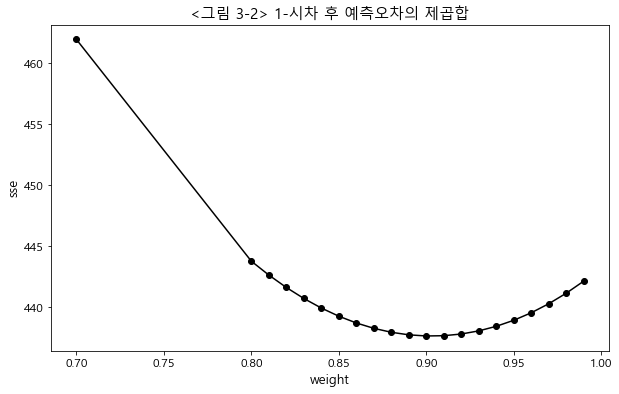

In [8]:
plt.figure(figsize=(10,6))
plt.plot(w1, sse1, color='k' ,marker='o')
plt.xlabel('weight', fontsize=13)
plt.ylabel('sse', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 3-2> 1-시차 후 예측오차의 제곱합', fontsize=15)
plt.show()

In [9]:
# ========================================================================================
# <그림 3-1> 중간재 출하지수 자료와 단순지수평활된 값의 시계열그림(omega = 0.9)
# ========================================================================================

optimal_w = w_lst[sse_lst.index(min(sse_lst))] # minimum sse

fit1 = SES(mindex).fit(smoothing_level=0.7, optimized= True)
fcast1 = fit1.forecast(6) # 6-시차 까지 foecasting

xhat_ary = fcast1.get_values()

z = 1.96 # 신뢰구간 95%의 z-value
sse = fit1.sse
resid_std = np.sqrt(sse/len(mindex))


# Constructing Prediction Intervals
predint_xminus_lst = []
predint_xplus_lst = []
for h,xhat in zip(range(6), xhat_ary):
    predint_xminus = xhat - z * resid_std * np.sqrt(h+1)
    predint_xplus  = xhat + z * resid_std * np.sqrt(h+1)
    predint_xminus_lst.append(predint_xminus)
    predint_xplus_lst.append(predint_xplus)
    
pred_intervals = pd.DataFrame(fcast1, columns=['forcast'])
pred_intervals['Hi 95'] = predint_xminus_lst
pred_intervals['Lo 95'] = predint_xplus_lst

C:\Users\shb52\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  # Remove the CWD from sys.path while we load stuff.


In [10]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.700000,False
initial_level,l.0,10.007118,True


In [11]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.700000,False
initial_level,l.0,10.007118,True


C:\Users\shb52\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


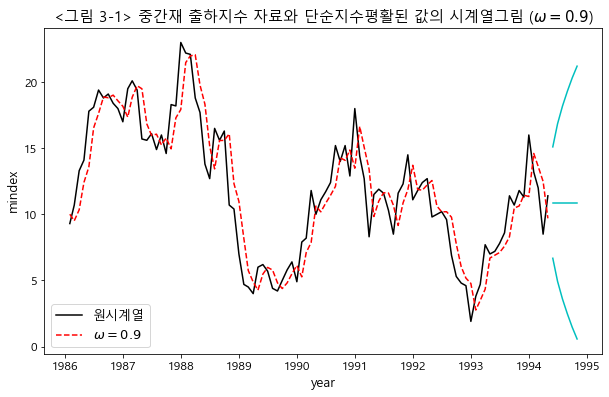

In [12]:
plt.figure(figsize=(10,6))
plt.plot(mindex, color='k')
plt.plot(fit1.fittedvalues, color='r', linestyle='--')
plt.plot(pred_intervals, color='c')
plt.xlabel('year', fontsize=13)
plt.ylabel('mindex', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 3-1> 중간재 출하지수 자료와 단순지수평활된 값의 시계열그림 ($ \omega = 0.9 $)', fontsize=15)
plt.legend(['원시계열', '$ \omega = 0.9 $'], fontsize=13, loc='lower left')
plt.show()

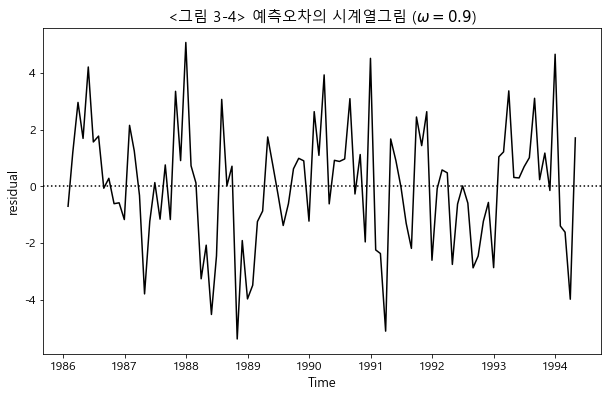

In [13]:
# =======================================================
# <그림 3-4> 예측오차의 시계열그림 (omega=0.9)
# =======================================================

plt.figure(figsize=(10,6))
plt.plot(fit1.resid, color='k')
plt.xlabel('Time', fontsize=13)
plt.ylabel('residual', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 3-4> 예측오차의 시계열그림 ($ \omega = 0.9 $)', fontsize=15)
plt.axhline(0, color = 'k', linestyle = ':')
plt.show()

In [14]:
# ========================================================================================
# <그림 3-3> 중간재 출하지수 자료와 단순지수평활된 값의 시계열그림(omega = 0.2)
# ========================================================================================

fit2 = SES(mindex).fit(smoothing_level=0.2, optimized= False)
facst2 = fit2.forecast(6)
xhat_ary = facst2.get_values()

z = 1.96 # 신뢰구간 95%의 z-value
sse = fit2.sse
resid_std = np.sqrt(sse/len(mindex))

# Constructing Prediction Intervals
predint_xminus_lst = []
predint_xplus_lst = []
for h,xhat in zip(range(6), xhat_ary):
    predint_xminus = xhat - z * resid_std * np.sqrt(h+1)
    predint_xplus  = xhat + z * resid_std * np.sqrt(h+1)
    predint_xminus_lst.append(predint_xminus)
    predint_xplus_lst.append(predint_xplus)
    
pred_intervals = pd.DataFrame(facst2, columns=['forcast'])
pred_intervals['Hi 95'] = predint_xminus_lst
pred_intervals['Lo 95'] = predint_xplus_lst

C:\Users\shb52\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys


In [15]:
fit2.params_formatted

,name,param,optimized
smoothing_level,alpha,0.2,False
initial_level,l.0,9.3,False


In [16]:
fit2.params_formatted

,name,param,optimized
smoothing_level,alpha,0.2,False
initial_level,l.0,9.3,False


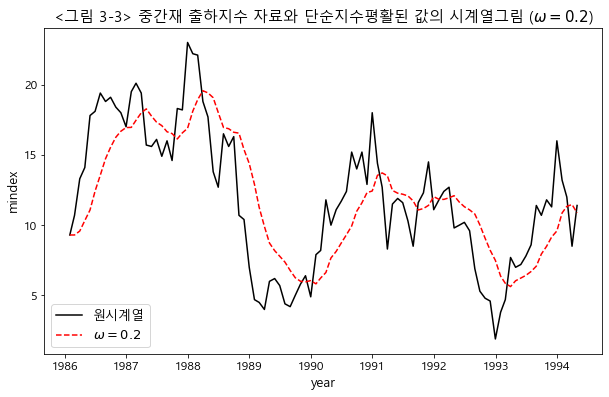

In [17]:
plt.figure(figsize=(10,6))
plt.plot(mindex, color='k')
plt.plot(fit2.fittedvalues, color='r', linestyle= '--')
#plt.plot(pred_intervals, color='c')
plt.xlabel('year', fontsize=13)
plt.ylabel('mindex', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 3-3> 중간재 출하지수 자료와 단순지수평활된 값의 시계열그림 ($ \omega = 0.2 $)', fontsize=15)
plt.legend(['원시계열', '$ \omega = 0.2 $'], fontsize=13, loc='lower left')
plt.show()

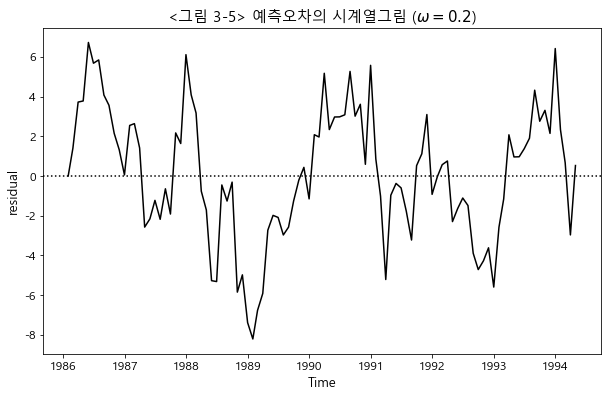

In [18]:
# ========================================================================================
# <그림 3-5> 예측오차의 시계열그림(omega = 0.2)
# ========================================================================================

plt.figure(figsize=(10,6))
plt.plot(fit2.resid, color='k')
plt.xlabel('Time', fontsize=13)
plt.ylabel('residual', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 3-5> 예측오차의 시계열그림 ($ \omega = 0.2 $)', fontsize=15)
plt.axhline(0, color = 'k', linestyle = ':')
plt.show()

In [19]:
# ========================================================================================
# 중간재 출하지수 자료와 단순지수평활된 값의 시계열그림(omega = optimal)
# ========================================================================================

fit3 = SES(mindex).fit(optimized= True)
fcast3 = fit3.forecast(6)
xhat_ary = fcast3.get_values()

z = 1.96 # 신뢰구간 95%의 z-value
sse = fit3.sse
resid_std = np.sqrt(sse/len(mindex))

# Constructing Prediction Intervals
predint_xminus_lst = []
predint_xplus_lst = []
for h,xhat in zip(range(6), xhat_ary):
    predint_xminus = xhat - z * resid_std * np.sqrt(h+1)
    predint_xplus  = xhat + z * resid_std * np.sqrt(h+1)
    predint_xminus_lst.append(predint_xminus)
    predint_xplus_lst.append(predint_xplus)
    
pred_intervals = pd.DataFrame(fcast3, columns=['forcast'])
pred_intervals['Hi 95'] = predint_xminus_lst
pred_intervals['Lo 95'] = predint_xplus_lst

C:\Users\shb52\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys


In [20]:
fit3.params

{'smoothing_level': 0.903097664774052,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 9.46113316191216,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

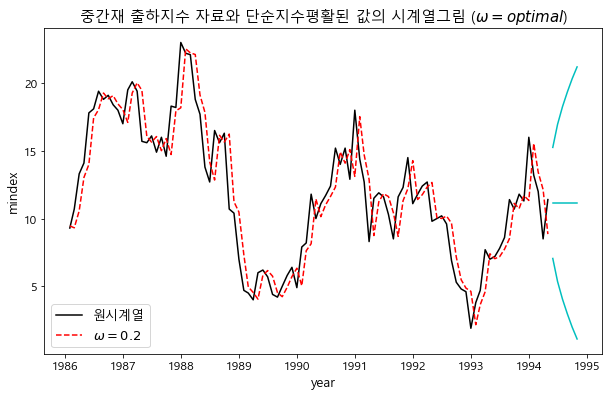

In [21]:
plt.figure(figsize=(10,6))
plt.plot(mindex, color='k')
plt.plot(fit3.fittedvalues, color='r', linestyle= '--')
plt.plot(pred_intervals, color='c')
plt.xlabel('year', fontsize=13)
plt.ylabel('mindex', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('중간재 출하지수 자료와 단순지수평활된 값의 시계열그림 ($ \omega = optimal $)', fontsize=15)
plt.legend(['원시계열', '$ \omega = 0.2 $'], fontsize=13, loc='lower left')
plt.show()

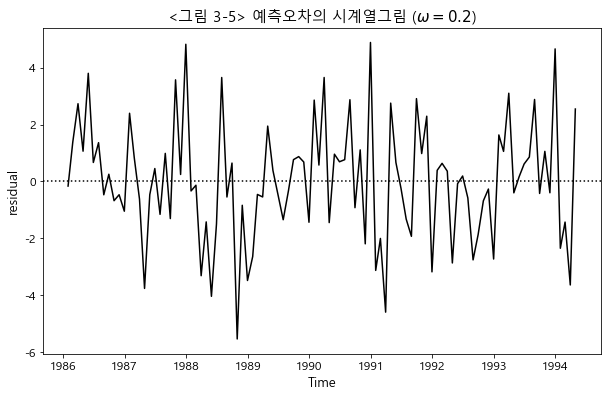

In [22]:
# ========================================================================================
# 예측오차의 시계열그림(omega = optimal)
# ========================================================================================

plt.figure(figsize=(10,6))
plt.plot(fit3.resid, color='k')
plt.xlabel('Time', fontsize=13)
plt.ylabel('residual', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 3-5> 예측오차의 시계열그림 ($ \omega = 0.2 $)', fontsize=15)
plt.axhline(0, color = 'k', linestyle = ':')
plt.show()

# Example 3.2 : 이중지수평활법

In [23]:
# =================
# Data Load
# =================

raw_data = pd.read_csv("D:\금융시계열분석세미나\제5판_시계열분석_프로그램\제5판 시계열분석 data/stock.txt",
            sep=' ', names=list(range(13)), skipinitialspace=True)
raw_data_ary = np.array(raw_data).flatten()
raw_data_ary = raw_data_ary[~np.isnan(raw_data_ary)]

# ========================================================================
# <그림 3-6> 중간재 출하지수 자료와 단순지수평활된 값의 시계열그림
# ========================================================================

#관측치 데이터
stock = pd.DataFrame({'Data' : raw_data_ary},
                      index=pd.date_range(start='1984-01', freq='M', periods=len(raw_data_ary)) )

fit4 = Holt(stock, exponential=False).fit(smoothing_level=0.6, initial_level=115.6009, initial_slope=6.809777,
                                         smoothing_slope=0.6, optimized=True) #SES는 단순지수평활로 기울기 모수 추정 X, maximizing log-likelihood
acf(fit4.resid, nlags=12)

C:\Users\shb52\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:720: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  warn(message, EstimationWarning)
C:\Users\shb52\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.34313332, -0.24733239, -0.38374784, -0.15216747,
        0.02849341, -0.11021438, -0.26206334, -0.07141779,  0.31374419,
        0.38135879,  0.06915233, -0.19124297])

In [24]:
fit4.params_formatted

,name,param,optimized
smoothing_level,alpha,0.600000,False
smoothing_slope,beta,0.600000,False
initial_level,l.0,115.600900,False
initial_slope,b.0,6.809777,False


In [25]:
fit4.aic

704.274958001474

In [26]:
fit4.bic

714.5323507673454

In [27]:
fit4.fittedvalues

1984-01-31    122.410677
1984-02-29    125.562204
1984-03-31    135.106821
1984-04-30    136.337413
1984-05-31    138.176981
                 ...    
1991-08-31    625.426322
1991-09-30    708.266602
1991-10-31    717.057137
1991-11-30    728.782382
1991-12-31    689.362022
Freq: M, Length: 96, dtype: float64

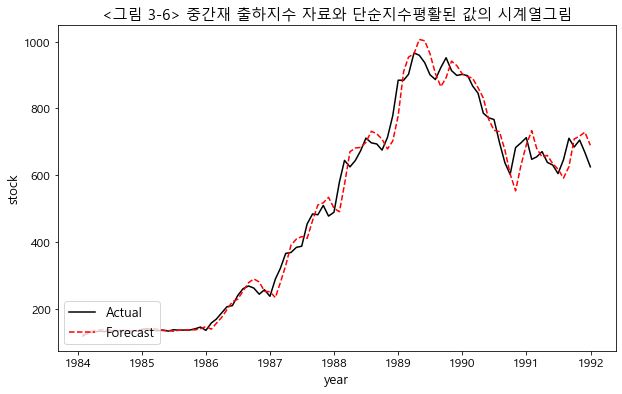

In [28]:
plt.figure(figsize=(10,6))
plt.plot(stock, color='k')
plt.plot(fit4.fittedvalues, color='r', linestyle= '--')
plt.xlabel('year', fontsize=13)
plt.ylabel('stock', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 3-6> 중간재 출하지수 자료와 단순지수평활된 값의 시계열그림', fontsize=15)
plt.legend(['Actual', 'Forecast'], fontsize=13, loc='lower left')
plt.show()

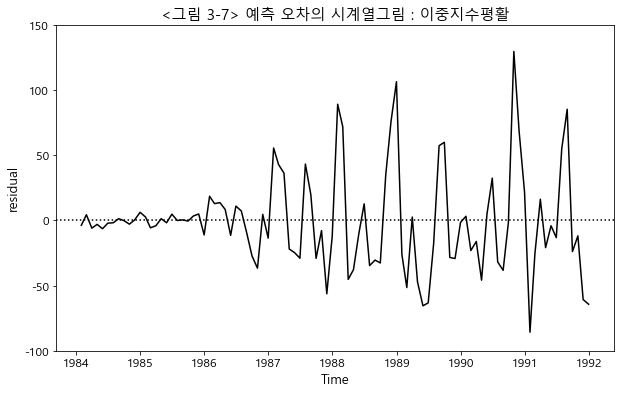

In [29]:
# ========================================================================================
# 예측오차의 시계열그림 : 이중지수평활
# ========================================================================================

plt.figure(figsize=(10,6))
plt.plot(fit4.resid, color='k')
plt.xlabel('Time', fontsize=13)
plt.ylabel('residual', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(ticks=[-100, -50, 0, 50, 100, 150], fontsize=12)
plt.title('<그림 3-7> 예측 오차의 시계열그림 : 이중지수평활', fontsize=15)
plt.axhline(0, color = 'k', linestyle = ':')
plt.show()

# Example 3.3 : Holt-Winters Method

In [30]:
# =================
# Data Load
# =================

raw_data = pd.read_csv("D:\금융시계열분석세미나\제5판_시계열분석_프로그램\제5판 시계열분석 data/koreapass.txt",
            sep=' ', names=list(range(13)), skipinitialspace=True)
raw_data_ary = np.array(raw_data).flatten()
raw_data_ary = raw_data_ary[~np.isnan(raw_data_ary)]

In [31]:
#관측치 데이터
koreapass = pd.DataFrame({'Data' : raw_data_ary},
                      index=pd.date_range(start='1981-01', freq='M', periods=len(raw_data_ary)) )


#optimize는 모수추정을 위한 것, smoothing_level,slope,seasonal이 모두 주어지면, optimize를 한것과 안한것은 차이가 없음
#trend는 추세항의 level과 slope이 가법의 관계인지 승법의 관계인지를 구분, trend를 입력하지 않으면 추세항이 단순지수평활이됨
fit5 = ExponentialSmoothing(koreapass,
                            seasonal='add',
                            trend='add',
                            seasonal_periods=12).fit(optimized=False,
                                                     smoothing_level=0.4,    
                                                     smoothing_slope=0.1,
                                                     smoothing_seasonal=0.7)
fit6 = ExponentialSmoothing(koreapass,
                            seasonal='mul',
                            trend='add',
                            seasonal_periods=12).fit(optimized=True,
                                                     smoothing_level=0.5,
                                                     smoothing_slope=0.1, 
                                                     smoothing_seasonal=0.4)

In [32]:
fit5.fittedvalues

1981-01-31    113570.069444
1981-02-28    104433.548333
1981-03-31    124402.693733
1981-04-30    144178.073224
1981-05-31    151726.417989
                  ...      
1989-08-31    403463.350742
1989-09-30    317654.529486
1989-10-31    398488.961953
1989-11-30    377818.653667
1989-12-31    311416.033146
Freq: M, Length: 108, dtype: float64

In [33]:
fit5.fittedvalues

1981-01-31    113570.069444
1981-02-28    104433.548333
1981-03-31    124402.693733
1981-04-30    144178.073224
1981-05-31    151726.417989
                  ...      
1989-08-31    403463.350742
1989-09-30    317654.529486
1989-10-31    398488.961953
1989-11-30    377818.653667
1989-12-31    311416.033146
Freq: M, Length: 108, dtype: float64

In [34]:
acf(fit5.resid, nlags=12)

array([ 1.        ,  0.1060607 ,  0.00353227,  0.0698946 , -0.17547288,
       -0.06955817,  0.01533439, -0.01025642,  0.06002452, -0.0563858 ,
       -0.05542103, -0.03280239, -0.34549942])

In [35]:
acf(fit6.resid, nlags=12)

array([ 1.        ,  0.02174776, -0.05695642,  0.09871157, -0.19191718,
       -0.10240641,  0.11212989,  0.07745322,  0.11412497, -0.06313013,
       -0.08427529, -0.03150798, -0.38051877])

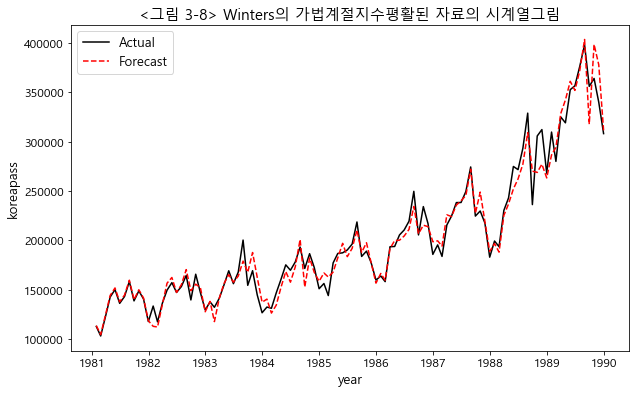

In [36]:
plt.figure(figsize=(10,6))
plt.plot(koreapass, color='k')
plt.plot(fit5.fittedvalues, color='r', linestyle= '--')
plt.xlabel('year', fontsize=13)
plt.ylabel('koreapass', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 3-8> Winters의 가법계절지수평활된 자료의 시계열그림', fontsize=15)
plt.legend(['Actual', 'Forecast'], fontsize=13, loc='upper left')
plt.show()

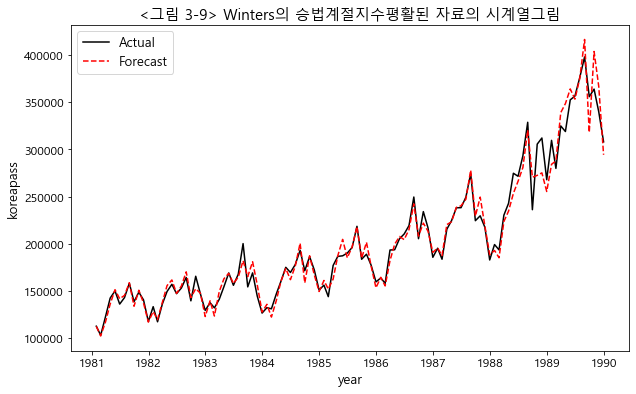

In [37]:
plt.figure(figsize=(10,6))
plt.plot(koreapass, color='k')
plt.plot(fit6.fittedvalues, color='r', linestyle= '--')
plt.xlabel('year', fontsize=13)
plt.ylabel('koreapass', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('<그림 3-9> Winters의 승법계절지수평활된 자료의 시계열그림', fontsize=15)
plt.legend(['Actual', 'Forecast'], fontsize=13, loc='upper left')
plt.show()

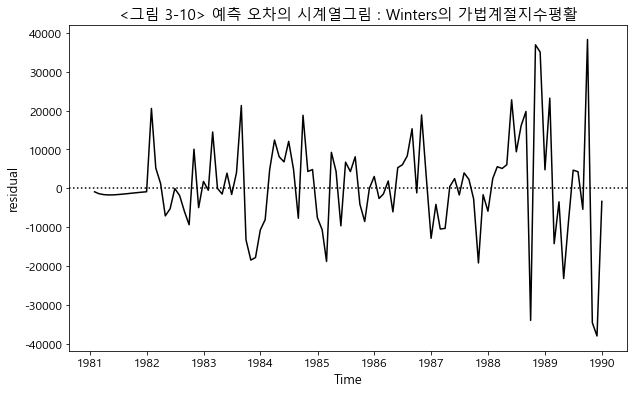

In [38]:
# ========================================================================================
# 예측오차의 시계열그림 : 가법계절지수평활
# ========================================================================================

plt.figure(figsize=(10,6))
plt.plot(fit5.resid, color='k')
plt.xlabel('Time', fontsize=13)
plt.ylabel('residual', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.title('<그림 3-10> 예측 오차의 시계열그림 : Winters의 가법계절지수평활', fontsize=15)
plt.axhline(0, color = 'k', linestyle = ':')
plt.show()

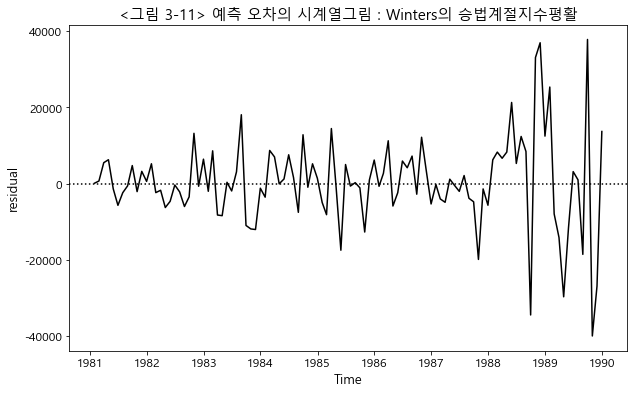

In [39]:
# ========================================================================================
# 예측오차의 시계열그림 : 승법계절지수평활
# ========================================================================================

plt.figure(figsize=(10,6))
plt.plot(fit6.resid, color='k')
plt.xlabel('Time', fontsize=13)
plt.ylabel('residual', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, ticks=np.linspace(-40000, 40000, 5)) 
plt.title('<그림 3-11> 예측 오차의 시계열그림 : Winters의 승법계절지수평활', fontsize=15)
plt.axhline(0, color = 'k', linestyle = ':')
plt.show()